In [ ]:
from google.colab import drive
import os
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


AUTHOR’S PREFACE 


On April Ist, 1924, I began to serve my sentence of detention in the 
Fortress o

Number of words for hitler = 259513


Number of words for trump = 693305


Number of words for biden = 230897

length shortest corpus = 230897



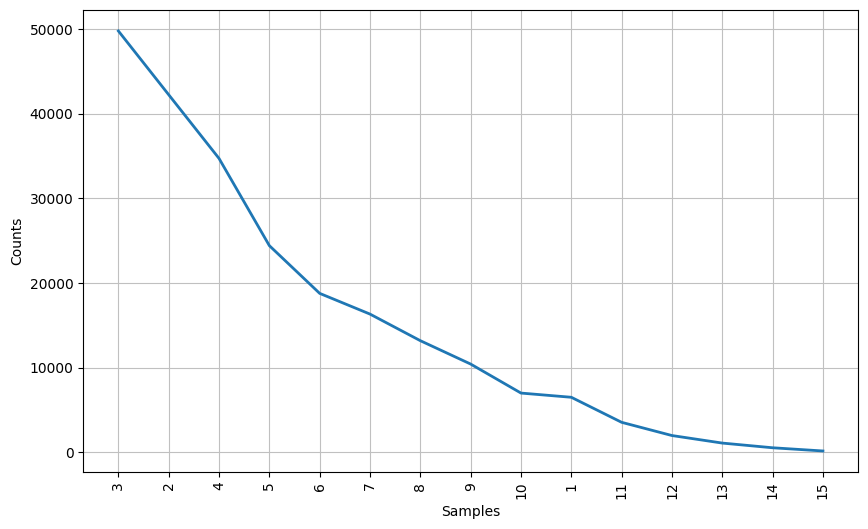

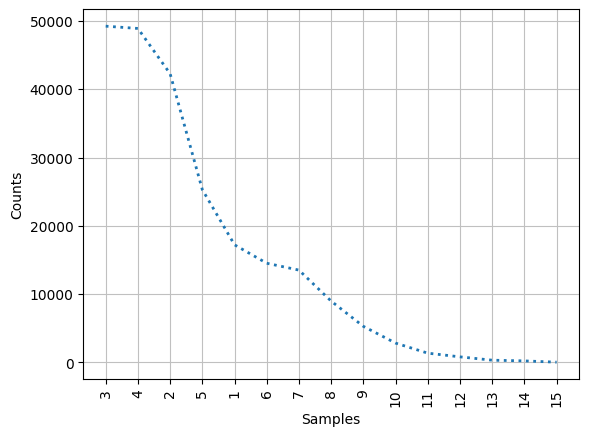

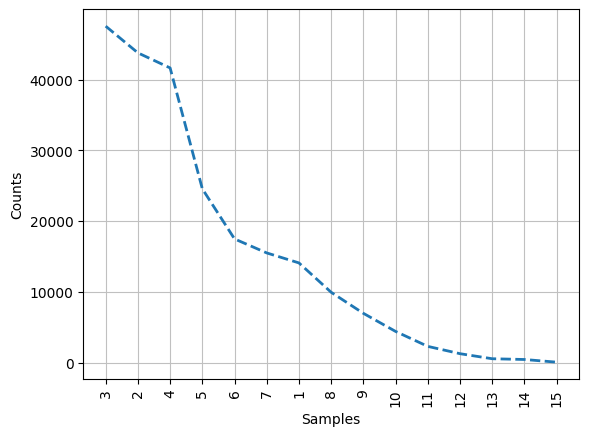

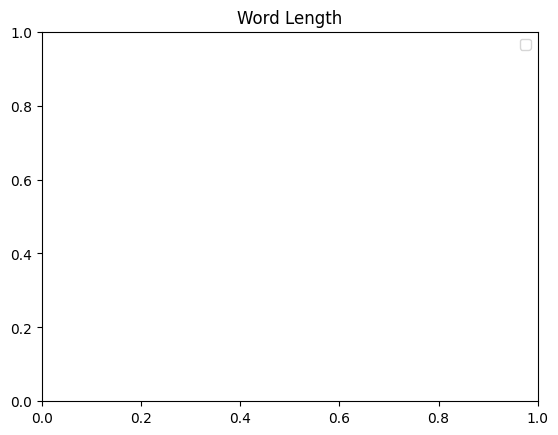

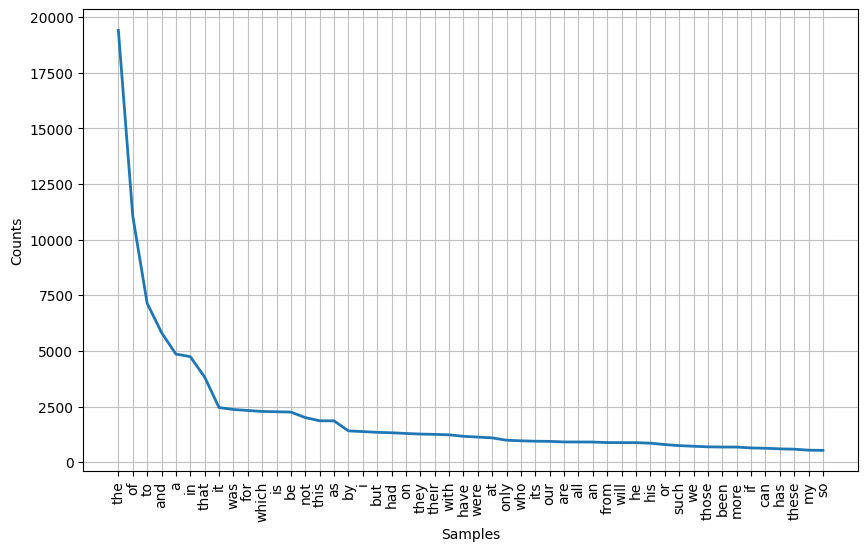

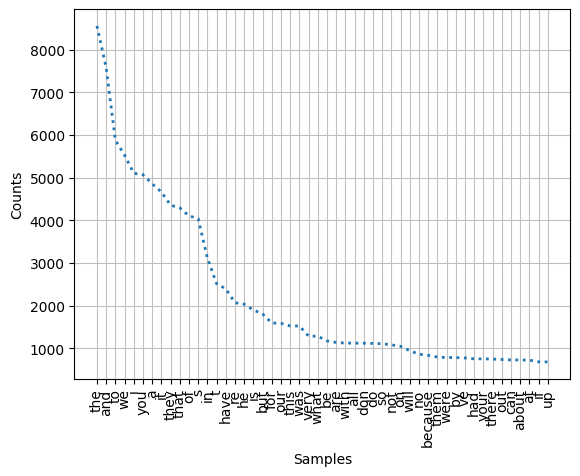

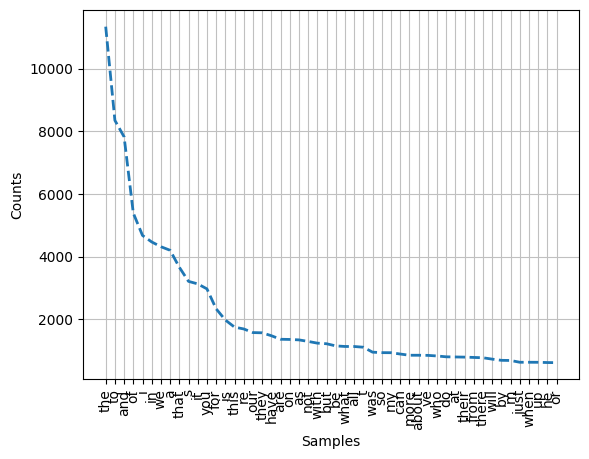

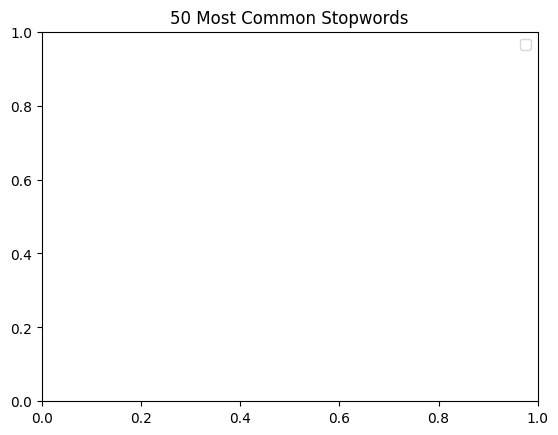

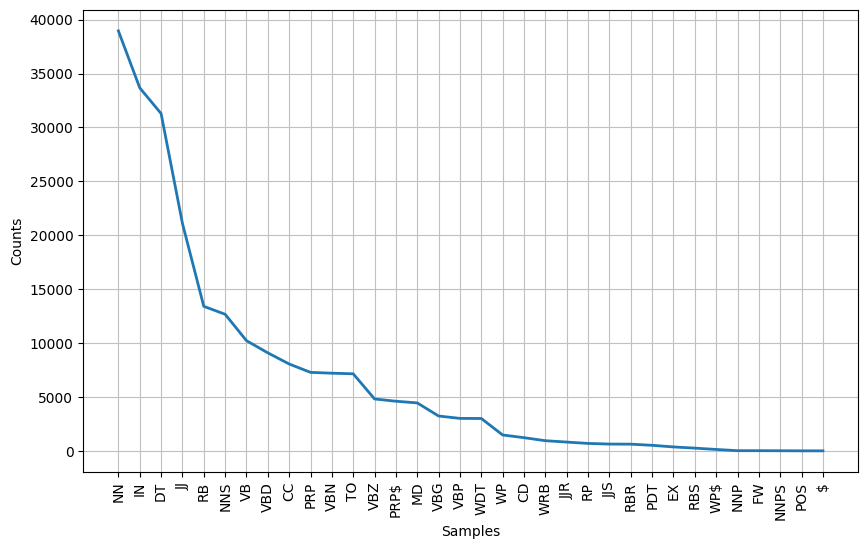

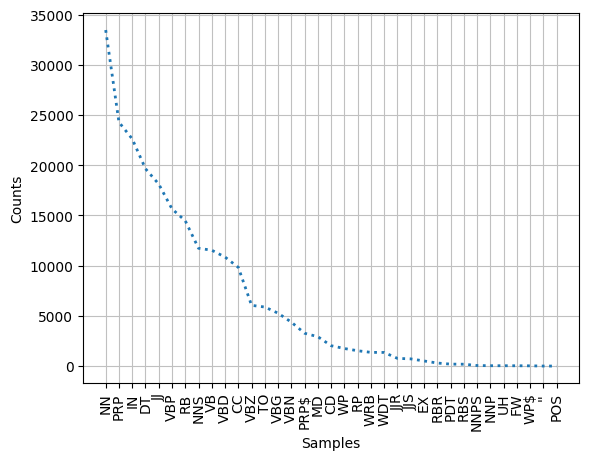

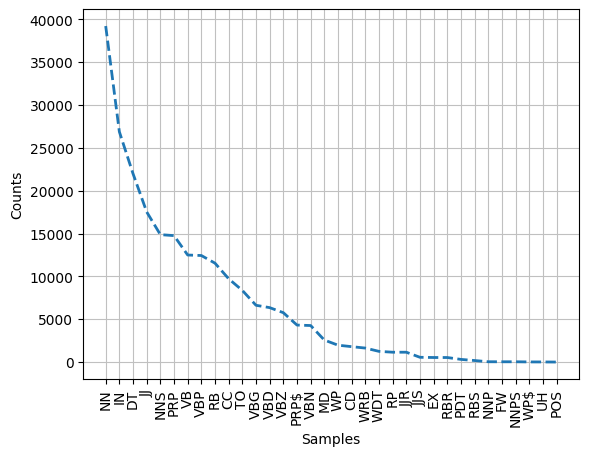

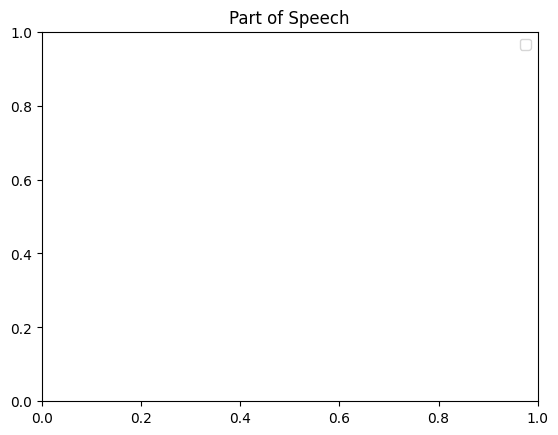

Chi-squared for trump = 45411.4
Chi-squared for biden = 45177.4
Most-likely author by vocabulary is biden

Jaccard Similarity for trump = 0.26296196020035195
Jaccard Similarity for biden = 0.29386564013411154
Most-likely author by similarity is biden


In [ ]:
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

LINES = ['-', ':', '--']
# Line style for plots.

def main():
    nltk.download('punkt')
    nltk.download('stopwords')
    nltk.download('averaged_perceptron_tagger')

    strings_by_author = dict()
    strings_by_author['hitler'] = text_to_string('datasets/MeinK/stalag_edition/CUT_Mein Kampf Stalag Edition _djvu.txt')
    strings_by_author['trump'] = text_to_string('datasets/my_trump/00_cleaned_files/all_files.txt')
    strings_by_author['biden'] = text_to_string('datasets/my_biden/00_cleaned_files/all_files.txt')
    strings_by_author['bush'] = text_to_string('datasets/my_bush/all_files.txt')
    strings_by_author['obama'] = text_to_string('datasets/my_obama/all_files.txt')

    print(strings_by_author['hitler'][:100])

    words_by_author = make_word_dict(strings_by_author)
    len_shortest_corpus = find_shortest_corpus(words_by_author)
    word_length_test(words_by_author, len_shortest_corpus)
    stopwords_test(words_by_author, len_shortest_corpus)
    parts_of_speech_test(words_by_author, len_shortest_corpus)
    vocab_test(words_by_author)
    jaccard_test(words_by_author, len_shortest_corpus)


def text_to_string(filename):
    """Read a text file and return a string."""
    with open(filename, encoding='utf-8') as infile:
        return infile.read()

def make_word_dict(strings_by_author):
    """Return dictionary of tokenized words by corpus by author."""
    words_by_author = dict()
    for author in strings_by_author:
        tokens = nltk.word_tokenize(strings_by_author[author])
        words_by_author[author] = ([token.lower() for token in tokens if token.isalpha()])
    return words_by_author

def find_shortest_corpus(words_by_author):
    """Return length of shortest corpus."""
    word_count = []
    for author in words_by_author:
        word_count.append(len(words_by_author[author]))
        print('\nNumber of words for {} = {}\n'.format(author, len(words_by_author[author])))
    len_shortest_corpus = min(word_count)
    print('length shortest corpus = {}\n'.format(len_shortest_corpus))
    return len_shortest_corpus

def word_length_test(words_by_author, len_shortest_corpus):
    """Plot word length freq by author, truncated to shortest corpus length."""
    plt.figure(figsize=(10, 6))

    for i, author in enumerate(words_by_author):
        word_lengths = [len(word) for word in words_by_author[author][:len_shortest_corpus]]
        freq_dist = nltk.FreqDist(word_lengths)
        freq_dist.plot(15, linestyle=LINES[i], label=author)

    plt.title('Word Length')
    plt.legend()
    #plt.show()

def stopwords_test(words_by_author, len_shortest_corpus):
    """Plot stopwords freq by author, truncated to shortest corpus length."""
    plt.figure(figsize=(10, 6))
    stop_words = set(stopwords.words('english'))  # Use set for speed.

    for i, author in enumerate(words_by_author):
        stopwords_by_author = [word for word in words_by_author[author][:len_shortest_corpus] if word in stop_words]
        freq_dist = nltk.FreqDist(stopwords_by_author)
        freq_dist.plot(50, label=author, linestyle=LINES[i])

    plt.title('50 Most Common Stopwords')
    plt.legend()
    plt.show()

def parts_of_speech_test(words_by_author, len_shortest_corpus):
    """Plot author use of parts-of-speech such as nouns, verbs, adverbs, etc."""
    plt.figure(figsize=(10, 6))

    for i, author in enumerate(words_by_author):
        pos_by_author = [pos[1] for pos in nltk.pos_tag(words_by_author[author][:len_shortest_corpus])]
        freq_dist = nltk.FreqDist(pos_by_author)
        freq_dist.plot(35, label=author, linestyle=LINES[i])

    plt.title('Part of Speech')
    plt.legend()
    plt.show()

def vocab_test(words_by_author):
    """Compare author vocabularies using the Chi Squared statistical test."""
    chisquared_by_author = dict()

    for author in words_by_author:
        if author != 'hitler':
            combined_corpus = (words_by_author[author] + words_by_author['hitler'])
            author_proportion = (len(words_by_author[author]) / len(combined_corpus))
            combined_freq_dist = nltk.FreqDist(combined_corpus)
            most_common_words = list(combined_freq_dist.most_common(1000))

            chisquared = 0
            for word, combined_count in most_common_words:
                observed_count_author = words_by_author[author].count(word)
                expected_count_author = combined_count * author_proportion
                chisquared += ((observed_count_author - expected_count_author) ** 2 / expected_count_author)
            chisquared_by_author[author] = chisquared
            print('Chi-squared for {} = {:.1f}'.format(author, chisquared))

    most_likely_author = min(chisquared_by_author, key=chisquared_by_author.get)
    print('Most-likely author by vocabulary is {}\n'.format(most_likely_author))

def jaccard_test(words_by_author, len_shortest_corpus):
    """Calculate Jaccard similarity of each known corpus to unknown corpus."""
    jaccard_by_author = dict()
    unique_words_unknown = set(words_by_author['hitler'][:len_shortest_corpus])

    authors = (author for author in words_by_author if author != 'hitler')
    for author in authors:
        unique_words_author = set(words_by_author[author][:len_shortest_corpus])
        shared_words = unique_words_author.intersection(unique_words_unknown)
        jaccard_sim = (float(len(shared_words)) / (len(unique_words_author) +
                                                   len(unique_words_unknown) -
                                                   len(shared_words)))
        jaccard_by_author[author] = jaccard_sim
        print('Jaccard Similarity for {} = {}'.format(author, jaccard_sim))

    most_likely_author = max(jaccard_by_author, key=jaccard_by_author.get)
    print('Most-likely author by similarity is {}'.format(most_likely_author))

if __name__ == "__main__":
    main()
